In [82]:
#Imports
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import seaborn as sb
import csv
import requests
import json
import math

In [83]:
# Read White Wine CSV
white_wine_read = 'winequality-white.csv'
white_wine_df_rename = pd.read_csv(white_wine_read,sep='[:;]',engine='python')

white_wine_df_rename


,"""fixed acidity""","""volatile acidity""","""citric acid""","""residual sugar""","""chlorides""","""free sulfur dioxide""","""total sulfur dioxide""","""density""","""pH""","""sulphates""","""alcohol""","""quality"""
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [84]:
# Read Red Wine CSV
red_wine_read = 'winequality-red.csv'
red_wine_df = pd.read_csv(red_wine_read, sep='[:;]',engine='python')

red_wine_df


,"""fixed acidity""","""volatile acidity""","""citric acid""","""residual sugar""","""chlorides""","""free sulfur dioxide""","""total sulfur dioxide""","""density""","""pH""","""sulphates""","""alcohol""","""quality"""
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [85]:
#Drop Red empty Cells & Read Count
dropped_red_df = red_wine_df.dropna()
dropped_red_df
dropped_red_df.count()

"fixed acidity"           1599
"volatile acidity"        1599
"citric acid"             1599
"residual sugar"          1599
"chlorides"               1599
"free sulfur dioxide"     1599
"total sulfur dioxide"    1599
"density"                 1599
"pH"                      1599
"sulphates"               1599
"alcohol"                 1599
"quality"                 1599
dtype: int64

In [86]:
# Drop White empty cells $ read count
dropped_white_df = white_wine_df_rename.dropna()
dropped_white_df
dropped_white_df.count()

"fixed acidity"           4898
"volatile acidity"        4898
"citric acid"             4898
"residual sugar"          4898
"chlorides"               4898
"free sulfur dioxide"     4898
"total sulfur dioxide"    4898
"density"                 4898
"pH"                      4898
"sulphates"               4898
"alcohol"                 4898
"quality"                 4898
dtype: int64

In [87]:
#Find Mean & Mode
white_quality_mean = white_wine_df_rename['"quality"'].mean()
white_quality_mean


5.87790935075541

In [88]:
red_wine_df_rename = red_wine_df.rename(columns={'"fixed acidity"':'Fixed Acidity',
                                                '"volatile acidity"':'Volatile Acidity',
                                                '"citric acid"':'Citric Acid',
                                                '"residual sugar"':'Residual Sugar',
                                                '"chlorides"':'Chlorides',
                                                '"free sulfur dioxide"':'Free Sulfur Dioxide',
                                                '"total sulfur dioxide"':'Total Sulfur Dioxide',
                                                '"density"':'Density',
                                                 '"pH"':'pH',
                                                 '"sulphates"':'Sulphates',
                                                 '"alcohol"':'Alcohol',
                                                '"quality"':'Quality'})

red_wine_df_rename.columns = red_wine_df_rename.columns.str.strip()

red_wine_df_rename

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [89]:
dropped_red_df = red_wine_df_rename.dropna()
dropped_red_df
dropped_red_df.count()

Fixed Acidity           1599
Volatile Acidity        1599
Citric Acid             1599
Residual Sugar          1599
Chlorides               1599
Free Sulfur Dioxide     1599
Total Sulfur Dioxide    1599
Density                 1599
pH                      1599
Sulphates               1599
Alcohol                 1599
Quality                 1599
dtype: int64

In [90]:
averages = red_wine_df_rename.describe()
averages

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [91]:
white_wine_df_rename = white_wine_df_rename.rename(columns={'"fixed acidity"':'Fixed Acidity',
                                                '"volatile acidity"':'Volatile Acidity',
                                                '"citric acid"':'Citric Acid',
                                                '"residual sugar"':'Residual Sugar',
                                                '"chlorides"':'Chlorides',
                                                '"free sulfur dioxide"':'Free Sulfur Dioxide',
                                                '"total sulfur dioxide"':'Total Sulfur Dioxide',
                                                '"density"':'Density',
                                                 '"pH"':'pH',
                                                 '"sulphates"':'Sulphates',
                                                 '"alcohol"':'Alcohol',
                                                '"quality"':'Quality'})
white_wine_df_rename.columns = white_wine_df_rename.columns.str.strip()

white_wine_df_rename

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [92]:
white_high_quality_df = white_wine_df_rename.sort_values('Quality', ascending=False).head(int(white_wine_df_rename.shape[0]*.5)) 
white_high_quality_df


,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Quality
827,7.4,0.24,0.36,2.0,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,9
1605,7.1,0.26,0.49,2.2,0.032,31.0,113.0,0.99030,3.37,0.42,12.9,9
876,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9
774,9.1,0.27,0.45,10.6,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,9
820,6.6,0.36,0.29,1.6,0.021,24.0,85.0,0.98965,3.41,0.61,12.4,9
...,...,...,...,...,...,...,...,...,...,...,...,...
1771,6.5,0.18,0.26,1.4,0.041,40.0,141.0,0.99410,3.34,0.72,9.5,6
1772,7.8,0.40,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,6
1773,7.8,0.39,0.26,9.9,0.059,33.0,181.0,0.99550,3.04,0.42,10.9,6
1774,6.9,0.19,0.28,3.0,0.054,33.0,99.0,0.99240,3.16,0.40,10.8,6


In [93]:
red_high_quality = white_wine_df_rename.sort_values('Quality', ascending=True).head(int(white_wine_df_rename.shape[0]*.5)) 
red_high_quality

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Quality
3307,9.4,0.24,0.29,8.5,0.037,124.0,208.0,0.99395,2.90,0.38,11.0,3
445,7.1,0.32,0.32,11.0,0.038,16.0,66.0,0.99370,3.24,0.40,11.5,3
2050,11.8,0.23,0.38,11.1,0.034,15.0,123.0,0.99970,2.93,0.55,9.7,3
3810,6.8,0.26,0.34,15.1,0.060,42.0,162.0,0.99705,3.24,0.52,10.5,3
3409,6.2,0.23,0.35,0.7,0.051,24.0,111.0,0.99160,3.37,0.43,11.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3345,6.8,0.18,0.24,9.8,0.058,64.0,188.0,0.99520,3.13,0.51,10.6,6
3346,6.7,0.18,0.24,10.3,0.057,64.0,185.0,0.99519,3.12,0.50,10.6,6
3347,6.6,0.16,0.21,6.7,0.055,43.0,157.0,0.99384,3.15,0.52,10.8,6
3348,7.2,0.27,0.28,15.2,0.046,6.0,41.0,0.99665,3.17,0.39,10.9,6


In [94]:
red_low_quality_df = red_wine_df_rename.sort_values('Quality', ascending=True).head(int(red_wine_df.shape[0]*.5)) 
red_low_quality_df

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Quality
1478,7.1,0.875,0.05,5.7,0.082,3.0,14.0,0.99808,3.40,0.52,10.2,3
832,10.4,0.440,0.42,1.5,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3
899,8.3,1.020,0.02,3.4,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3
1374,6.8,0.815,0.00,1.2,0.267,16.0,29.0,0.99471,3.32,0.51,9.8,3
459,11.6,0.580,0.66,2.2,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1136,10.4,0.520,0.45,2.0,0.080,6.0,13.0,0.99774,3.22,0.76,11.4,6
1073,8.0,0.620,0.33,2.7,0.088,16.0,37.0,0.99720,3.31,0.58,10.7,6
1072,7.2,0.350,0.26,1.8,0.083,33.0,75.0,0.99680,3.40,0.58,9.5,6
1135,8.0,0.250,0.43,1.7,0.067,22.0,50.0,0.99460,3.38,0.60,11.9,6


In [95]:
white_low_quality_df_rename = red_low_quality_df.sort_values('Quality', ascending=False).head(int(red_low_quality_df.shape[0]*.5)) 
white_low_quality_df_rename

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Quality
1588,7.2,0.66,0.33,2.5,0.068,34.0,102.0,0.99414,3.27,0.78,12.8,6
1161,8.8,0.45,0.43,1.4,0.076,12.0,21.0,0.99551,3.21,0.75,10.2,6
1596,6.3,0.51,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1154,6.6,0.58,0.00,2.2,0.100,50.0,63.0,0.99544,3.59,0.68,11.4,6
1104,8.0,0.48,0.34,2.2,0.073,16.0,25.0,0.99360,3.28,0.66,12.4,6
...,...,...,...,...,...,...,...,...,...,...,...,...
10,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.99590,3.28,0.54,9.2,5
27,7.9,0.43,0.21,1.6,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
384,7.7,0.51,0.28,2.1,0.087,23.0,54.0,0.99800,3.42,0.74,9.2,5
1418,7.8,0.53,0.01,1.6,0.077,3.0,19.0,0.99500,3.16,0.46,9.8,5


## White Wine

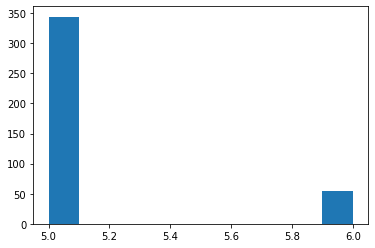

In [96]:
plt.hist(white_low_quality_df_rename['Quality'])
plt.show() 

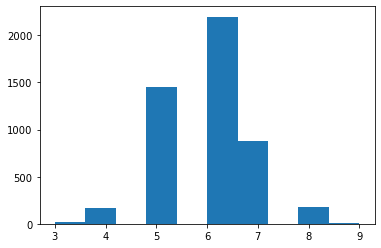

In [97]:
plt.hist(white_wine_df_rename['Quality'])
plt.show() 

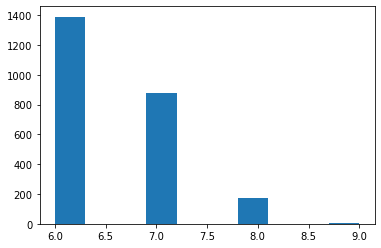

In [98]:
plt.hist(white_high_quality_df['Quality'])
plt.show() 

## Red Wine

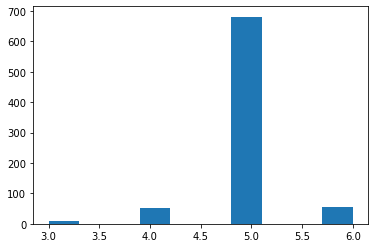

In [99]:
plt.hist(red_low_quality_df['Quality'])
plt.show() 

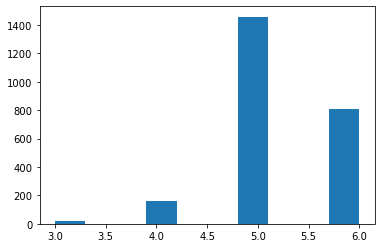

In [100]:
plt.hist(red_high_quality['Quality'])
plt.show() 

### Describing Data

In [101]:
white_low_quality_df_rename.describe()

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Quality
count,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000
mean,7.857393,0.565589,0.235514,2.473308,0.091466,17.157895,57.776942,0.996639,3.316892,0.638170,10.049123,5.137845
std,1.319677,0.164382,0.178502,1.376470,0.054855,11.095186,37.491478,0.001592,0.142608,0.176246,0.900994,0.345170
min,5.200000,0.160000,0.000000,0.900000,0.038000,3.000000,8.000000,0.990070,2.880000,0.390000,8.500000,5.000000
25%,7.000000,0.450000,0.090000,1.800000,0.072000,9.000000,27.000000,0.995820,3.210000,0.540000,9.400000,5.000000
50%,7.700000,0.575000,0.220000,2.100000,0.080000,15.000000,49.000000,0.996600,3.310000,0.590000,9.700000,5.000000
75%,8.350000,0.670000,0.345000,2.500000,0.092000,23.000000,84.500000,0.997470,3.410000,0.695000,10.500000,5.000000
max,13.500000,1.330000,0.790000,13.800000,0.611000,68.000000,153.000000,1.002420,3.720000,1.980000,13.500000,6.000000


In [102]:
white_high_quality_df.describe()

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Quality
count,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000
mean,6.717456,0.262713,0.330964,5.926644,0.041342,34.843405,128.276848,0.993021,3.189984,0.493887,11.065027,6.508371
std,0.787316,0.091332,0.104419,4.844547,0.016674,14.956455,36.596272,0.002995,0.150972,0.122296,1.243637,0.636601
min,3.800000,0.080000,0.000000,0.700000,0.012000,3.000000,18.000000,0.987110,2.800000,0.220000,8.500000,6.000000
25%,6.200000,0.200000,0.270000,1.800000,0.033000,25.000000,102.000000,0.990820,3.080000,0.400000,10.100000,6.000000
50%,6.700000,0.250000,0.310000,4.600000,0.039000,33.000000,124.000000,0.992400,3.180000,0.480000,11.100000,6.000000
75%,7.200000,0.310000,0.370000,8.800000,0.047000,43.000000,151.000000,0.994950,3.290000,0.560000,12.100000,7.000000
max,14.200000,0.965000,1.230000,65.800000,0.208000,112.000000,294.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [103]:
white_wine_df_rename.describe()

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [104]:
red_high_quality.describe()

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Quality
count,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000
mean,6.828869,0.294639,0.330555,6.856186,0.048390,35.028991,141.146999,0.994513,3.167922,0.481850,10.204817,5.247448
std,0.861425,0.109191,0.132230,5.330554,0.024515,18.737065,45.378062,0.002983,0.143697,0.102439,1.113275,0.607028
min,3.800000,0.085000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987220,2.790000,0.230000,8.000000,3.000000
25%,6.300000,0.230000,0.250000,1.700000,0.038000,21.000000,110.000000,0.992340,3.080000,0.410000,9.300000,5.000000
50%,6.700000,0.280000,0.310000,6.200000,0.045000,33.000000,138.000000,0.994400,3.160000,0.470000,10.000000,5.000000
75%,7.300000,0.340000,0.390000,10.700000,0.052000,47.000000,174.000000,0.996600,3.240000,0.530000,10.933333,6.000000
max,11.800000,1.100000,1.230000,65.800000,0.346000,289.000000,440.000000,1.038980,3.800000,1.010000,14.000000,6.000000


In [105]:
red_low_quality_df.describe()

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Quality
count,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000
mean,8.125407,0.580670,0.241227,2.520901,0.092134,16.575720,53.469337,0.996943,3.311202,0.619925,10.021652,4.977472
std,1.573008,0.179993,0.183929,1.366013,0.054493,10.904298,36.313045,0.001680,0.153855,0.173336,0.851105,0.430065
min,4.600000,0.160000,0.000000,0.900000,0.038000,3.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.450000,0.080000,1.900000,0.073000,8.000000,23.000000,0.996000,3.200000,0.530000,9.400000,5.000000
50%,7.800000,0.580000,0.230000,2.200000,0.081000,15.000000,44.000000,0.996900,3.310000,0.580000,9.700000,5.000000
75%,8.900000,0.677500,0.365000,2.600000,0.094000,23.000000,75.000000,0.997860,3.405000,0.660000,10.500000,5.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,155.000000,1.003150,3.900000,2.000000,14.900000,6.000000


In [106]:
red_wine_df_rename.describe()

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Heatmaps

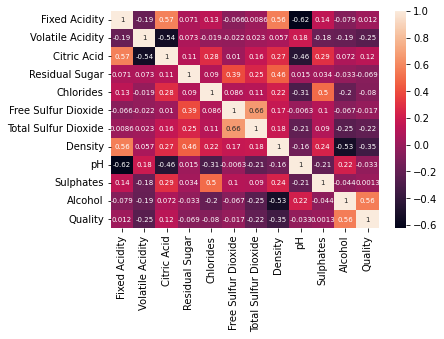

In [108]:
#low quality white wine
dataplot = sb.heatmap(white_low_quality_df_rename.corr(), annot=True, annot_kws={"size":7})

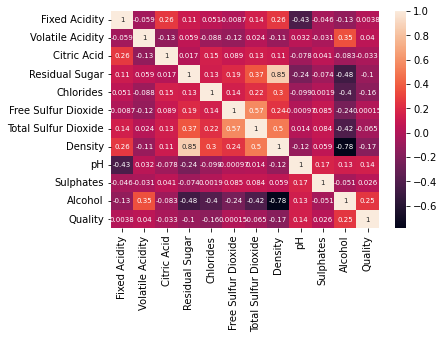

In [109]:
#High Quality white wine
dataplot = sb.heatmap(white_high_quality_df.corr(), annot=True, annot_kws={"size":7})

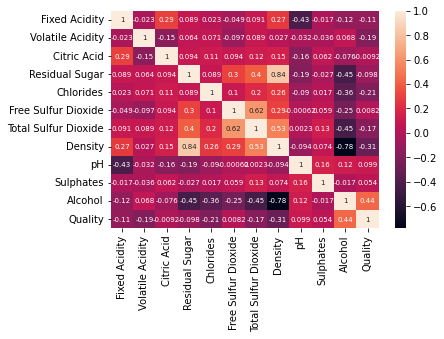

In [110]:
#All white wine
dataplot = sb.heatmap(white_wine_df_rename.corr(), annot=True, annot_kws={"size":7})

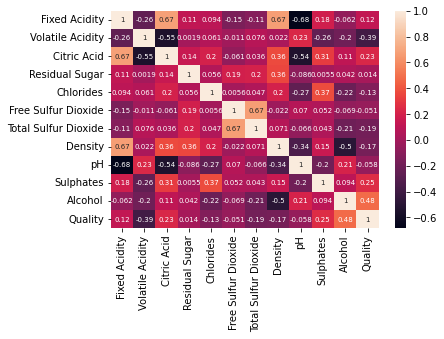

In [111]:
#All Red Wine
dataplot = sb.heatmap(red_wine_df_rename.corr(), annot=True, annot_kws={"size":7})

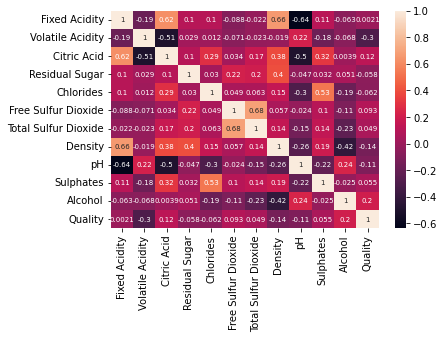

In [112]:
#low quality red wines 
dataplot = sb.heatmap(red_low_quality_df.corr(), annot=True, annot_kws={"size":7})

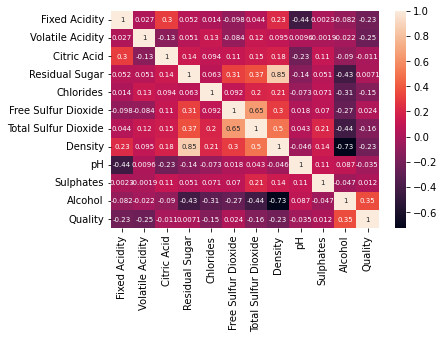

In [113]:
#Hight Quality Reds
dataplot = sb.heatmap(red_high_quality.corr(), annot=True, annot_kws={"size":7})

## Bar Charts, ALL WHITE WINE


In [114]:
#Create Average for each attribute - ALL WHITE WINES

all_avg_fixed_acidity = white_wine_df_rename['Fixed Acidity'].mean()
all_avg_volatile_acidity = white_wine_df_rename['Volatile Acidity'].mean()
all_avg_citric_acid = white_wine_df_rename['Citric Acid'].mean()
all_avg_chlorides = white_wine_df_rename['Chlorides'].mean()
all_avg_free_sulfur = white_wine_df_rename['Free Sulfur Dioxide'].mean()
all_avg_total_sulfur = white_wine_df_rename['Total Sulfur Dioxide'].mean()
all_avg_density = white_wine_df_rename['Density'].mean()
all_avg_pH = white_wine_df_rename['pH'].mean()
all_avg_sulphates = white_wine_df_rename['Sulphates'].mean()
all_avg_alcohol = white_wine_df_rename['Alcohol'].mean()
all_avg_residual_sugar = white_wine_df_rename['Residual Sugar'].mean()


In [115]:
#create dataframe to hold above data ALL WHITE WINE
all_white_wine_summary = pd.DataFrame({"Fixed Acidity": [all_avg_fixed_acidity],
                            "Volatile Acidty":[all_avg_volatile_acidity],
                            "Citric Acid": [all_avg_citric_acid],
                            "Residual Sugar": [all_avg_residual_sugar],
                            "Chlorides": [all_avg_chlorides],
                            "Free Sulfur": [all_avg_free_sulfur],
                            "Total Sulfur": [all_avg_total_sulfur],
                            "Density": [all_avg_density],
                            "pH":[all_avg_pH],
                            "Sulphates":[all_avg_sulphates],
                            "Alcohol":[all_avg_alcohol]})
all_white_wine_summary

,Fixed Acidity,Volatile Acidty,Citric Acid,Residual Sugar,Chlorides,Free Sulfur,Total Sulfur,Density,pH,Sulphates,Alcohol
0,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267


In [116]:
all_white_summary = {"Fixed Acidity": all_avg_fixed_acidity,
                            "Volatile Acidty":all_avg_volatile_acidity,
                            "Citric Acid": all_avg_citric_acid,
                            "Residual Sugar": all_avg_residual_sugar,
                            "Chlorides": all_avg_chlorides,
                            "Free Sulfur": all_avg_free_sulfur,
                            "Total Sulfur": all_avg_total_sulfur,
                            "Density": all_avg_density,
                            "pH":all_avg_pH,
                            "Sulphates":all_avg_sulphates,
                            "Alcohol":all_avg_alcohol}
all_white_summary

{'Fixed Acidity': 6.854787668436075,
 'Volatile Acidty': 0.27824111882401087,
 'Citric Acid': 0.33419150673743736,
 'Residual Sugar': 6.391414863209486,
 'Chlorides': 0.0457723560636995,
 'Free Sulfur': 35.30808493262556,
 'Total Sulfur': 138.36065741118824,
 'Density': 0.9940273764801896,
 'pH': 3.1882666394446693,
 'Sulphates': 0.4898468762760325,
 'Alcohol': 10.514267047774638}

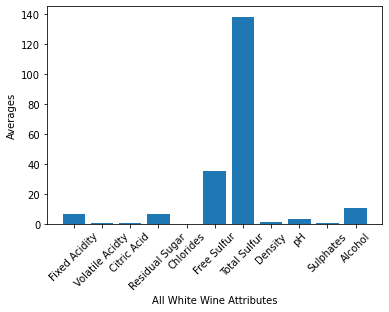

In [117]:
attributes = list(all_white_summary.keys())
amount = list(all_white_summary.values())
plt.ylabel('Averages')
plt.xlabel('All White Wine Attributes')
plt.xticks(rotation = 45)
plt.bar(range(len(all_white_summary)), amount, tick_label=attributes, )
plt.show()

### White - Low



In [118]:
low_avg_fixed_acidity = white_low_quality_df_rename['Fixed Acidity'].mean()
low_avg_volatile_acidity = white_low_quality_df_rename['Volatile Acidity'].mean()
low_avg_citric_acid = white_low_quality_df_rename['Citric Acid'].mean()
low_avg_chlorides = white_low_quality_df_rename['Chlorides'].mean()
low_avg_free_sulfur = white_low_quality_df_rename['Free Sulfur Dioxide'].mean()
low_avg_total_sulfur = white_low_quality_df_rename['Total Sulfur Dioxide'].mean()
low_avg_density = white_low_quality_df_rename['Density'].mean()
low_avg_pH = white_low_quality_df_rename['pH'].mean()
low_avg_sulphates = white_low_quality_df_rename['Sulphates'].mean()
low_avg_alcohol = white_low_quality_df_rename['Alcohol'].mean()
low_avg_residual_sugar = white_low_quality_df_rename['Residual Sugar'].mean()


In [119]:
low_white_wine_summary = pd.DataFrame({"Fixed Acidity": [low_avg_fixed_acidity],
                            "Volatile Acidty":[low_avg_volatile_acidity],
                            "Citric Acid": [low_avg_citric_acid],
                            "Residual Sugar": [low_avg_residual_sugar],
                            "Chlorides": [low_avg_chlorides],
                            "Free Sulfur": [low_avg_free_sulfur],
                            "Total Sulfur": [low_avg_total_sulfur],
                            "Density": [low_avg_density],
                            "pH":[low_avg_pH],
                            "Sulphates":[low_avg_sulphates],
                            "Alcohol":[low_avg_alcohol]})
low_white_wine_summary

,Fixed Acidity,Volatile Acidty,Citric Acid,Residual Sugar,Chlorides,Free Sulfur,Total Sulfur,Density,pH,Sulphates,Alcohol
0,7.857393,0.565589,0.235514,2.473308,0.091466,17.157895,57.776942,0.996639,3.316892,0.63817,10.049123


In [120]:
low_white_wine_summary = {"Fixed Acidity": low_avg_fixed_acidity,
                            "Volatile Acidty":low_avg_volatile_acidity,
                            "Citric Acid": low_avg_citric_acid,
                            "Residual Sugar": low_avg_residual_sugar,
                            "Chlorides": low_avg_chlorides,
                            "Free Sulfur": low_avg_free_sulfur,
                            "Total Sulfur": low_avg_total_sulfur,
                            "Density": low_avg_density,
                            "pH":low_avg_pH,
                            "Sulphates":low_avg_sulphates,
                            "Alcohol":low_avg_alcohol}
low_white_wine_summary

{'Fixed Acidity': 7.857393483709275,
 'Volatile Acidty': 0.5655889724310776,
 'Citric Acid': 0.23551378446115276,
 'Residual Sugar': 2.4733082706766902,
 'Chlorides': 0.09146616541353386,
 'Free Sulfur': 17.157894736842106,
 'Total Sulfur': 57.77694235588972,
 'Density': 0.9966386967418535,
 'pH': 3.316892230576439,
 'Sulphates': 0.6381704260651638,
 'Alcohol': 10.049122807017547}

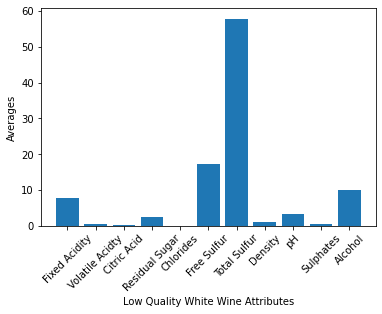

In [121]:
attributes = list(low_white_wine_summary.keys())
amount = list(low_white_wine_summary.values())
plt.ylabel('Averages')
plt.xlabel('Low Quality White Wine Attributes')
plt.xticks(rotation = 45)
plt.bar(range(len(low_white_wine_summary)), amount, tick_label=attributes)
plt.show()

### White High


In [122]:
high_avg_fixed_acidity = white_high_quality_df['Fixed Acidity'].mean()
high_avg_volatile_acidity = white_high_quality_df['Volatile Acidity'].mean()
high_avg_citric_acid = white_high_quality_df['Citric Acid'].mean()
high_avg_chlorides = white_high_quality_df['Chlorides'].mean()
high_avg_free_sulfur = white_high_quality_df['Free Sulfur Dioxide'].mean()
high_avg_total_sulfur = white_high_quality_df['Total Sulfur Dioxide'].mean()
high_avg_density = white_high_quality_df['Density'].mean()
high_avg_pH = white_high_quality_df['pH'].mean()
high_avg_sulphates = white_high_quality_df['Sulphates'].mean()
high_avg_alcohol = white_high_quality_df['Alcohol'].mean()
high_avg_residual_sugar = white_high_quality_df['Residual Sugar'].mean()

In [123]:
high_white_wine_summary = pd.DataFrame({"Fixed Acidity": [high_avg_fixed_acidity],
                            "Volatile Acidty":[high_avg_volatile_acidity],
                            "Citric Acid": [high_avg_citric_acid],
                            "Residual Sugar": [high_avg_residual_sugar],
                            "Chlorides": [high_avg_chlorides],
                            "Free Sulfur": [high_avg_free_sulfur],
                            "Total Sulfur": [high_avg_total_sulfur],
                            "Density": [high_avg_density],
                            "pH":[high_avg_pH],
                            "Sulphates":[high_avg_sulphates],
                            "Alcohol":[high_avg_alcohol]})
high_white_wine_summary

,Fixed Acidity,Volatile Acidty,Citric Acid,Residual Sugar,Chlorides,Free Sulfur,Total Sulfur,Density,pH,Sulphates,Alcohol
0,6.717456,0.262713,0.330964,5.926644,0.041342,34.843405,128.276848,0.993021,3.189984,0.493887,11.065027


In [124]:
high_white_wine_summary = {"Fixed Acidity": high_avg_fixed_acidity,
                            "Volatile Acidty":high_avg_volatile_acidity,
                            "Citric Acid": high_avg_citric_acid,
                            "Residual Sugar": high_avg_residual_sugar,
                            "Chlorides": high_avg_chlorides,
                            "Free Sulfur": high_avg_free_sulfur,
                            "Total Sulfur": high_avg_total_sulfur,
                            "Density": high_avg_density,
                            "pH":high_avg_pH,
                            "Sulphates":high_avg_sulphates,
                            "Alcohol":high_avg_alcohol}
high_white_wine_summary

{'Fixed Acidity': 6.717456104532471,
 'Volatile Acidty': 0.2627133523887302,
 'Citric Acid': 0.33096365863617777,
 'Residual Sugar': 5.9266435279706,
 'Chlorides': 0.04134177215189904,
 'Free Sulfur': 34.84340547162107,
 'Total Sulfur': 128.2768476929359,
 'Density': 0.9930205328705591,
 'pH': 3.189983666802774,
 'Sulphates': 0.49388730093915867,
 'Alcohol': 11.065026541445528}

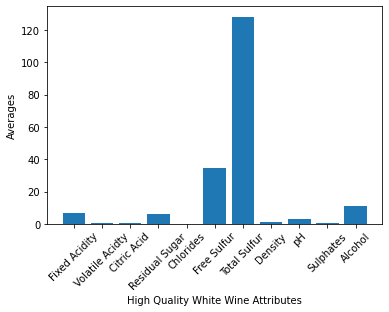

In [125]:
attributes = list(high_white_wine_summary.keys())
amount = list(high_white_wine_summary.values())
plt.ylabel('Averages')
plt.xlabel('High Quality White Wine Attributes')
plt.xticks(rotation = 45)
plt.bar(range(len(high_white_wine_summary)), amount, tick_label=attributes)
plt.show()

# Red Wine Bar Charts

In [126]:
#Create Average for each attribute - ALL RED WINES
rall_avg_fixed_acidity = red_wine_df_rename['Fixed Acidity'].mean()
rall_avg_volatile_acidity = red_wine_df_rename['Volatile Acidity'].mean()
rall_avg_citric_acid = red_wine_df_rename['Citric Acid'].mean()
rall_avg_residual_sugar = red_wine_df_rename['Residual Sugar'].mean()
rall_avg_chlorides = red_wine_df_rename['Chlorides'].mean()
rall_avg_total_sulfur = red_wine_df_rename['Total Sulfur Dioxide'].mean()
rall_avg_density = red_wine_df_rename['Density'].mean()
rall_avg_pH = red_wine_df_rename['pH'].mean()
rall_avg_sulphates = red_wine_df_rename['Sulphates'].mean()
rall_avg_alcohol = red_wine_df_rename['Alcohol'].mean()
rall_avg_free_sulfur = red_wine_df_rename['Free Sulfur Dioxide'].mean()


In [127]:
rall_red_wine_summary = pd.DataFrame({"Fixed Acidity": [rall_avg_fixed_acidity],
                            "Volatile Acidty":[rall_avg_volatile_acidity],
                            "Citric Acid": [rall_avg_citric_acid],
                            "Residual Sugar": [rall_avg_residual_sugar],
                            "Chlorides": [rall_avg_chlorides],
                            "Free Sulfur": [rall_avg_free_sulfur],
                            "Total Sulfur": [rall_avg_total_sulfur],
                            "Density": [rall_avg_density],
                            "pH":[rall_avg_pH],
                            "Sulphates":[rall_avg_sulphates],
                            "Alcohol":[rall_avg_alcohol]})
rall_red_wine_summary

,Fixed Acidity,Volatile Acidty,Citric Acid,Residual Sugar,Chlorides,Free Sulfur,Total Sulfur,Density,pH,Sulphates,Alcohol
0,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983


In [128]:
rall_red_summary = {"Fixed Acidity": rall_avg_fixed_acidity,
                            "Volatile Acidty":rall_avg_volatile_acidity,
                            "Citric Acid": rall_avg_citric_acid,
                            "Residual Sugar": rall_avg_residual_sugar,
                            "Chlorides": rall_avg_chlorides,
                            "Free Sulfur": rall_avg_free_sulfur,
                            "Total Sulfur": rall_avg_total_sulfur,
                            "Density": rall_avg_density,
                            "pH":rall_avg_pH,
                            "Sulphates":rall_avg_sulphates,
                            "Alcohol":rall_avg_alcohol}
rall_red_summary

{'Fixed Acidity': 8.319637273295838,
 'Volatile Acidty': 0.5278205128205131,
 'Citric Acid': 0.2709756097560964,
 'Residual Sugar': 2.5388055034396517,
 'Chlorides': 0.08746654158849257,
 'Free Sulfur': 15.874921826141339,
 'Total Sulfur': 46.46779237023139,
 'Density': 0.9967466791744831,
 'pH': 3.311113195747343,
 'Sulphates': 0.6581488430268921,
 'Alcohol': 10.422983114446502}

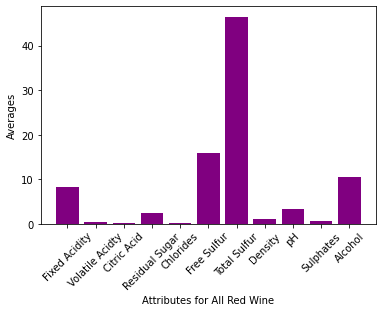

In [129]:
attributes = list(rall_red_summary.keys())
amount = list(rall_red_summary.values())
plt.ylabel('Averages')
plt.xlabel('Attributes for All Red Wine')
plt.xticks(rotation = 45)
plt.bar(range(len(rall_red_summary)), amount, tick_label=attributes, color="purple")
plt.show()

## Low Reds

In [130]:
#Create Average for each attribute - LOW RED WINES
rlow_avg_fixed_acidity = red_low_quality_df['Fixed Acidity'].mean()
rlow_avg_volatile_acidity = red_low_quality_df['Volatile Acidity'].mean()
rlow_avg_citric_acid = red_low_quality_df['Citric Acid'].mean()
rlow_avg_residual_sugar = red_low_quality_df['Residual Sugar'].mean()
rlow_avg_chlorides = red_low_quality_df['Chlorides'].mean()
rlow_avg_total_sulfur = red_low_quality_df['Total Sulfur Dioxide'].mean()
rlow_avg_density = red_low_quality_df['Density'].mean()
rlow_avg_pH = red_low_quality_df['pH'].mean()
rlow_avg_sulphates = red_low_quality_df['Sulphates'].mean()
rlow_avg_alcohol = red_low_quality_df['Alcohol'].mean()
rlow_avg_free_sulfur = red_low_quality_df['Free Sulfur Dioxide'].mean()

In [131]:
low_red_summary = pd.DataFrame({"Fixed Acidity": [rlow_avg_fixed_acidity],
                            "Volatile Acidty":[rlow_avg_volatile_acidity],
                            "Citric Acid": [rlow_avg_citric_acid],
                            "Residual Sugar": [rlow_avg_residual_sugar],
                            "Chlorides": [rlow_avg_chlorides],
                            "Free Sulfur": [rlow_avg_free_sulfur],
                            "Total Sulfur": [rlow_avg_total_sulfur],
                            "Density": [rlow_avg_density],
                            "pH":[rlow_avg_pH],
                            "Sulphates":[rlow_avg_sulphates],
                            "Alcohol":[rlow_avg_alcohol]})
low_red_summary

,Fixed Acidity,Volatile Acidty,Citric Acid,Residual Sugar,Chlorides,Free Sulfur,Total Sulfur,Density,pH,Sulphates,Alcohol
0,8.125407,0.58067,0.241227,2.520901,0.092134,16.57572,53.469337,0.996943,3.311202,0.619925,10.021652


In [132]:
low_red_summary = {"Fixed Acidity": rlow_avg_fixed_acidity,
                            "Volatile Acidty":rlow_avg_volatile_acidity,
                            "Citric Acid": rlow_avg_citric_acid,
                            "Residual Sugar": rlow_avg_residual_sugar,
                            "Chlorides": rlow_avg_chlorides,
                            "Free Sulfur": rlow_avg_free_sulfur,
                            "Total Sulfur": rlow_avg_total_sulfur,
                            "Density": rlow_avg_density,
                            "pH":rlow_avg_pH,
                            "Sulphates":rlow_avg_sulphates,
                            "Alcohol":rlow_avg_alcohol}
low_red_summary

{'Fixed Acidity': 8.125406758448053,
 'Volatile Acidty': 0.5806695869837294,
 'Citric Acid': 0.24122653316645826,
 'Residual Sugar': 2.5209011264080092,
 'Chlorides': 0.0921339173967458,
 'Free Sulfur': 16.575719649561954,
 'Total Sulfur': 53.46933667083855,
 'Density': 0.996942765957446,
 'pH': 3.311201501877349,
 'Sulphates': 0.619924906132665,
 'Alcohol': 10.021652065081343}

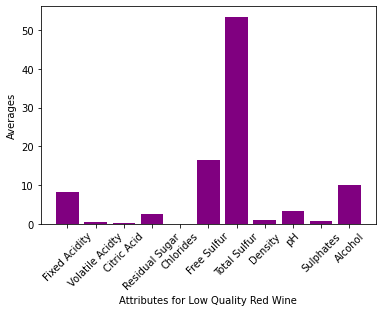

In [133]:
attributes = list(low_red_summary.keys())
amount = list(low_red_summary.values())
plt.ylabel('Averages')
plt.xlabel('Attributes for Low Quality Red Wine')
plt.xticks(rotation = 45)
plt.bar(range(len(low_red_summary)), amount, tick_label=attributes, color="purple")
plt.show()



## Red High

In [134]:
rhigh_avg_fixed_acidity = red_high_quality['Fixed Acidity'].mean()
rhigh_avg_volatile_acidity = red_high_quality['Volatile Acidity'].mean()
rhigh_avg_citric_acid = red_high_quality['Citric Acid'].mean()
rhigh_avg_chlorides = red_high_quality['Chlorides'].mean()
rhigh_avg_free_sulfur = red_high_quality['Free Sulfur Dioxide'].mean()
rhigh_avg_total_sulfur = red_high_quality['Total Sulfur Dioxide'].mean()
rhigh_avg_density = red_high_quality['Density'].mean()
rhigh_avg_pH = red_high_quality['pH'].mean()
rhigh_avg_sulphates = red_high_quality['Sulphates'].mean()
rhigh_avg_alcohol = red_high_quality['Alcohol'].mean()
rhigh_avg_residual_sugar = red_high_quality['Residual Sugar'].mean()

In [135]:
high_red_wine_summary = pd.DataFrame({"Fixed Acidity": [rhigh_avg_fixed_acidity],
                            "Volatile Acidty":[rhigh_avg_volatile_acidity],
                            "Citric Acid": [rhigh_avg_citric_acid],
                            "Residual Sugar": [rhigh_avg_residual_sugar],
                            "Chlorides": [rhigh_avg_chlorides],
                            "Free Sulfur": [rhigh_avg_free_sulfur],
                            "Total Sulfur": [rhigh_avg_total_sulfur],
                            "Density": [rhigh_avg_density],
                            "pH":[rhigh_avg_pH],
                            "Sulphates":[rhigh_avg_sulphates],
                            "Alcohol":[rhigh_avg_alcohol]})
high_red_wine_summary

,Fixed Acidity,Volatile Acidty,Citric Acid,Residual Sugar,Chlorides,Free Sulfur,Total Sulfur,Density,pH,Sulphates,Alcohol
0,6.828869,0.294639,0.330555,6.856186,0.04839,35.028991,141.146999,0.994513,3.167922,0.48185,10.204817


In [136]:
high_red_wine_summary = {"Fixed Acidity": rhigh_avg_fixed_acidity,
                            "Volatile Acidty":rhigh_avg_volatile_acidity,
                            "Citric Acid":rhigh_avg_citric_acid,
                            "Residual Sugar": rhigh_avg_residual_sugar,
                            "Chlorides": rhigh_avg_chlorides,
                            "Free Sulfur": rhigh_avg_free_sulfur,
                            "Total Sulfur": rhigh_avg_total_sulfur,
                            "Density": rhigh_avg_density,
                            "pH":rhigh_avg_pH,
                            "Sulphates":rhigh_avg_sulphates,
                            "Alcohol":rhigh_avg_alcohol}
high_red_wine_summary

{'Fixed Acidity': 6.828868926092289,
 'Volatile Acidty': 0.2946386280114334,
 'Citric Acid': 0.3305553287055931,
 'Residual Sugar': 6.85618619844835,
 'Chlorides': 0.04838954675377752,
 'Free Sulfur': 35.02899142507146,
 'Total Sulfur': 141.14699877501022,
 'Density': 0.9945125255206191,
 'pH': 3.1679216006533313,
 'Sulphates': 0.4818497345855449,
 'Alcohol': 10.204816932081153}

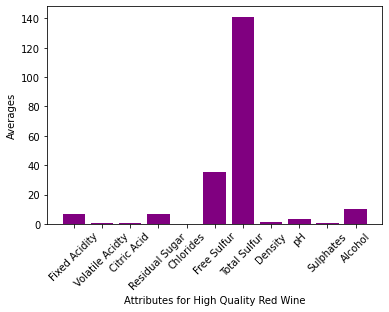

In [137]:
attributes = list(high_red_wine_summary.keys())
amount = list(high_red_wine_summary.values())
plt.ylabel('Averages')
plt.xlabel('Attributes for High Quality Red Wine')
plt.xticks(rotation = 45)
plt.bar(range(len(high_red_wine_summary)), amount, tick_label=attributes, color="purple")
plt.show()

# Comparison

## Red (all) vs White (all)

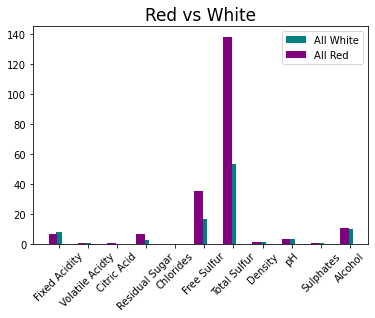

In [138]:
all_white_summary = {"Fixed Acidity": all_avg_fixed_acidity,
                            "Volatile Acidty":all_avg_volatile_acidity,
                            "Citric Acid": all_avg_citric_acid,
                            "Residual Sugar": all_avg_residual_sugar,
                            "Chlorides": all_avg_chlorides,
                            "Free Sulfur": all_avg_free_sulfur,
                            "Total Sulfur": all_avg_total_sulfur,
                            "Density": all_avg_density,
                            "pH":all_avg_pH,
                            "Sulphates":all_avg_sulphates,
                            "Alcohol":all_avg_alcohol}

rall_red_summary = {"Fixed Acidity": rall_avg_fixed_acidity,
                            "Volatile Acidty":rall_avg_volatile_acidity,
                            "Citric Acid": rall_avg_citric_acid,
                            "Residual Sugar": rall_avg_residual_sugar,
                            "Chlorides": rall_avg_chlorides,
                            "Free Sulfur": rall_avg_free_sulfur,
                            "Total Sulfur": rall_avg_total_sulfur,
                            "Density": rall_avg_density,
                            "pH":rall_avg_pH,
                            "Sulphates":rall_avg_sulphates,
                            "Alcohol":rall_avg_alcohol}



X = np.arange(len(low_red_summary))
ax = plt.subplot(111)
ax.bar(X, low_red_summary.values(), width=0.2, color='teal', align='center')
ax.bar(X-0.2, all_white_summary.values(), width=0.3, color='purple', align='center')
ax.legend(('All White','All Red')) ## not sure which is which???
plt.xticks(X, low_red_summary.keys())
plt.title("Red vs White", fontsize=17)
plt.xticks(rotation = 45)

plt.show()


## Red low vs White Low

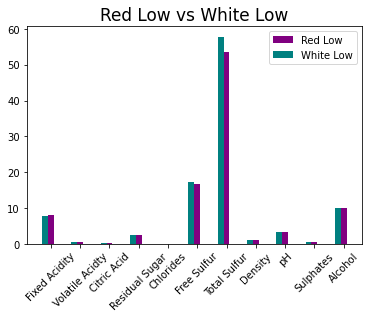

In [139]:
low_red_summary = {"Fixed Acidity": rlow_avg_fixed_acidity,
                            "Volatile Acidty":rlow_avg_volatile_acidity,
                            "Citric Acid": rlow_avg_citric_acid,
                            "Residual Sugar": rlow_avg_residual_sugar,
                            "Chlorides": rlow_avg_chlorides,
                            "Free Sulfur": rlow_avg_free_sulfur,
                            "Total Sulfur": rlow_avg_total_sulfur,
                            "Density": rlow_avg_density,
                            "pH":rlow_avg_pH,
                            "Sulphates":rlow_avg_sulphates,
                            "Alcohol":rlow_avg_alcohol}

low_white_wine_summary = {"Fixed Acidity": low_avg_fixed_acidity,
                            "Volatile Acidty":low_avg_volatile_acidity,
                            "Citric Acid": low_avg_citric_acid,
                            "Residual Sugar": low_avg_residual_sugar,
                            "Chlorides": low_avg_chlorides,
                            "Free Sulfur": low_avg_free_sulfur,
                            "Total Sulfur": low_avg_total_sulfur,
                            "Density": low_avg_density,
                            "pH":low_avg_pH,
                            "Sulphates":low_avg_sulphates,
                            "Alcohol":low_avg_alcohol}


X = np.arange(len(low_red_summary))
ax = plt.subplot(111)
ax.bar(X, low_red_summary.values(), width=0.2, color='purple', align='center')
ax.bar(X-0.2, low_white_wine_summary.values(), width=0.2, color='teal', align='center')
ax.legend(('Red Low','White Low')) ##not sure which is which???????
plt.xticks(X, low_red_summary.keys())
plt.title("Red Low vs White Low", fontsize=17)
plt.xticks(rotation = 45)

plt.show()


## Red high vs White high

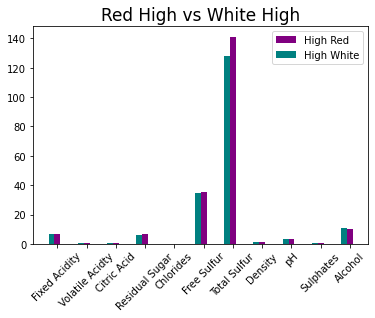

In [140]:
high_white_wine_summary = {"Fixed Acidity": high_avg_fixed_acidity,
                            "Volatile Acidty":high_avg_volatile_acidity,
                            "Citric Acid": high_avg_citric_acid,
                            "Residual Sugar": high_avg_residual_sugar,
                            "Chlorides": high_avg_chlorides,
                            "Free Sulfur": high_avg_free_sulfur,
                            "Total Sulfur": high_avg_total_sulfur,
                            "Density": high_avg_density,
                            "pH":high_avg_pH,
                            "Sulphates":high_avg_sulphates,
                            "Alcohol":high_avg_alcohol}

high_red_wine_summary = {"Fixed Acidity": rhigh_avg_fixed_acidity,
                            "Volatile Acidty":rhigh_avg_volatile_acidity,
                            "Citric Acid":rhigh_avg_citric_acid,
                            "Residual Sugar": rhigh_avg_residual_sugar,
                            "Chlorides": rhigh_avg_chlorides,
                            "Free Sulfur": rhigh_avg_free_sulfur,
                            "Total Sulfur": rhigh_avg_total_sulfur,
                            "Density": rhigh_avg_density,
                            "pH":rhigh_avg_pH,
                            "Sulphates":rhigh_avg_sulphates,
                            "Alcohol":rhigh_avg_alcohol}




X = np.arange(len(high_red_wine_summary))
ax = plt.subplot(111)
ax.bar(X, high_red_wine_summary.values(), width=0.2, color='purple', align='center')
ax.bar(X-0.2, high_white_wine_summary.values(), width=0.2, color='teal', align='center')
ax.legend(('High Red','High White')) ##help? not sure which is which??
plt.xticks(X, high_red_wine_summary.keys())
plt.title("Red High vs White High", fontsize=17)
plt.xticks(rotation = 45)



plt.show()


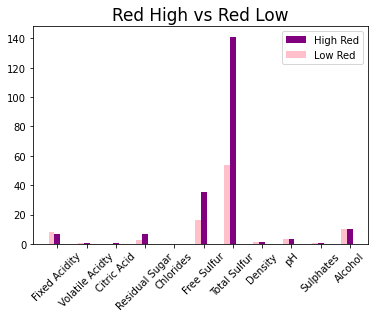

In [156]:
#Jill version 
low_red_summary = {"Fixed Acidity": rlow_avg_fixed_acidity,
                            "Volatile Acidty":rlow_avg_volatile_acidity,
                            "Citric Acid": rlow_avg_citric_acid,
                            "Residual Sugar": rlow_avg_residual_sugar,
                            "Chlorides": rlow_avg_chlorides,
                            "Free Sulfur": rlow_avg_free_sulfur,
                            "Total Sulfur": rlow_avg_total_sulfur,
                            "Density": rlow_avg_density,
                            "pH":rlow_avg_pH,
                            "Sulphates":rlow_avg_sulphates,
                            "Alcohol":rlow_avg_alcohol}

high_red_wine_summary = {"Fixed Acidity": rhigh_avg_fixed_acidity,
                            "Volatile Acidty":rhigh_avg_volatile_acidity,
                            "Citric Acid":rhigh_avg_citric_acid,
                            "Residual Sugar": rhigh_avg_residual_sugar,
                            "Chlorides": rhigh_avg_chlorides,
                            "Free Sulfur": rhigh_avg_free_sulfur,
                            "Total Sulfur": rhigh_avg_total_sulfur,
                            "Density": rhigh_avg_density,
                            "pH":rhigh_avg_pH,
                            "Sulphates":rhigh_avg_sulphates,
                            "Alcohol":rhigh_avg_alcohol}




X = np.arange(len(high_red_wine_summary))
ax = plt.subplot(111)
ax.bar(X, high_red_wine_summary.values(), width=0.2, color='purple', align='center')
ax.bar(X-0.2, low_red_summary.values(), width=0.2, color='pink', align='center')
ax.legend(('High Red','Low Red')) ##help? not sure which is which??
plt.xticks(X, high_red_wine_summary.keys())
plt.title("Red High vs Red Low", fontsize=17)
plt.xticks(rotation = 45)



plt.show()

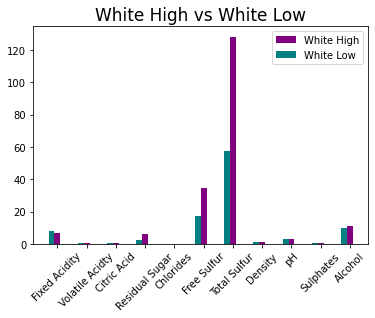

In [160]:
high_white_wine_summary = {"Fixed Acidity": high_avg_fixed_acidity,
                            "Volatile Acidty":high_avg_volatile_acidity,
                            "Citric Acid": high_avg_citric_acid,
                            "Residual Sugar": high_avg_residual_sugar,
                            "Chlorides": high_avg_chlorides,
                            "Free Sulfur": high_avg_free_sulfur,
                            "Total Sulfur": high_avg_total_sulfur,
                            "Density": high_avg_density,
                            "pH":high_avg_pH,
                            "Sulphates":high_avg_sulphates,
                            "Alcohol":high_avg_alcohol}

low_white_wine_summary = {"Fixed Acidity": low_avg_fixed_acidity,
                            "Volatile Acidty":low_avg_volatile_acidity,
                            "Citric Acid": low_avg_citric_acid,
                            "Residual Sugar": low_avg_residual_sugar,
                            "Chlorides": low_avg_chlorides,
                            "Free Sulfur": low_avg_free_sulfur,
                            "Total Sulfur": low_avg_total_sulfur,
                            "Density": low_avg_density,
                            "pH":low_avg_pH,
                            "Sulphates":low_avg_sulphates,
                            "Alcohol":low_avg_alcohol}


X = np.arange(len(low_white_wine_summary))
ax = plt.subplot(111)
ax.bar(X, high_white_wine_summary.values(), width=0.2, color='purple', align='center')
ax.bar(X-0.2, low_white_wine_summary.values(), width=0.2, color='teal', align='center')
ax.legend(('White High','White Low')) ##not sure which is which???????
plt.xticks(X, low_white_wine_summary.keys())
plt.title("White High vs White Low", fontsize=17)
plt.xticks(rotation = 45)

plt.show()

# Box Plots

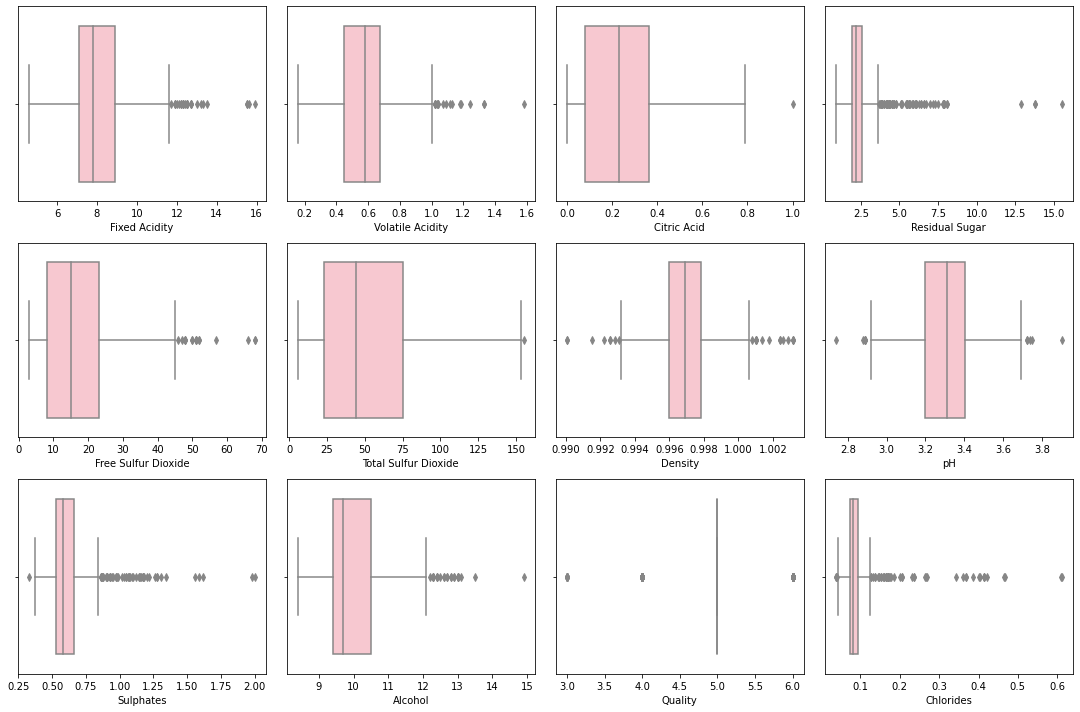

In [141]:
#BoxPlots
data = red_low_quality_df
c2="pink"
plt.figure(figsize=(15,10))


plt.subplot(3,4,1)
sb.boxplot(x ='Fixed Acidity', data = red_low_quality_df, color=c2)

plt.subplot(3,4,2)

sb.boxplot(x='Volatile Acidity', data = red_low_quality_df, color=c2)

plt.subplot(3,4,3)
sb.boxplot(x='Citric Acid', data = red_low_quality_df, color=c2)

plt.subplot(3,4,4)
sb.boxplot(x='Residual Sugar', data = red_low_quality_df, color=c2)

plt.subplot(3,4,5)
sb.boxplot(x='Free Sulfur Dioxide', data = red_low_quality_df, color=c2)

plt.subplot(3,4,6)
sb.boxplot(x='Total Sulfur Dioxide', data = red_low_quality_df, color=c2)

plt.subplot(3,4,7)
sb.boxplot(x='Density', data = red_low_quality_df, color=c2)

plt.subplot(3,4,8)
sb.boxplot(x='pH', data = red_low_quality_df, color=c2)

plt.subplot(3,4,9)
sb.boxplot(x='Sulphates', data = red_low_quality_df, color=c2)

plt.subplot(3,4,10)
sb.boxplot(x='Alcohol', data = red_low_quality_df, color=c2)

plt.subplot(3,4,11)
sb.boxplot(x='Quality', data = red_low_quality_df, color=c2)

plt.subplot(3,4,12)
sb.boxplot(x='Chlorides', data = red_low_quality_df, color=c2)

plt.tight_layout()

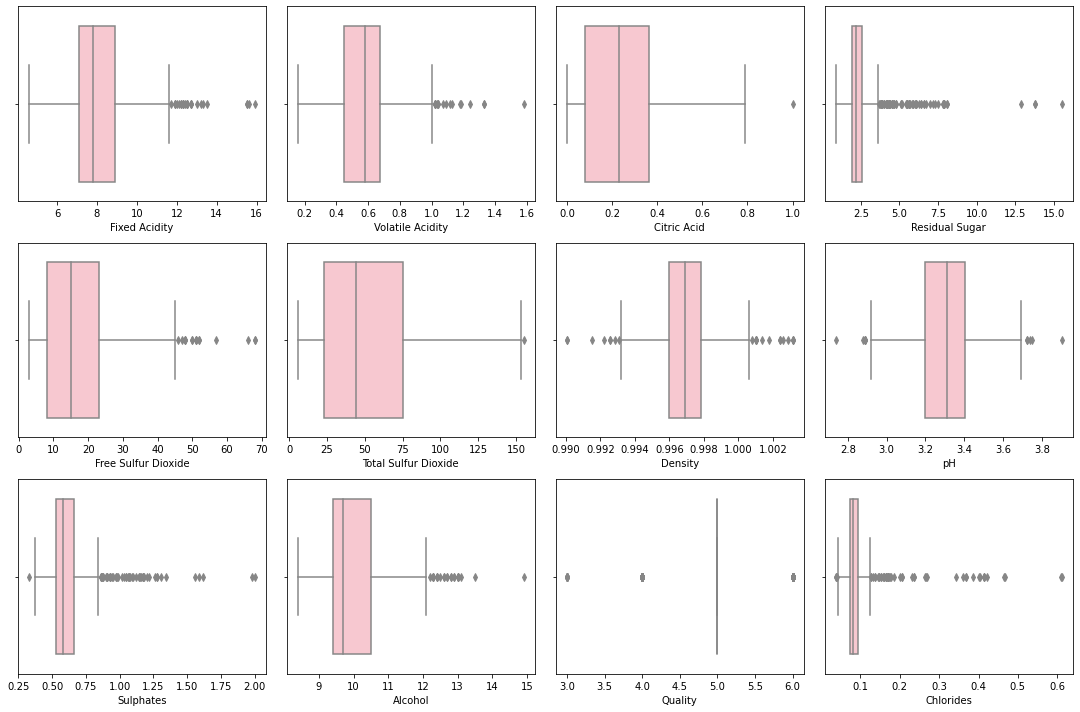

In [142]:
#BoxPlots
data = red_low_quality_df
c2="pink"
plt.figure(figsize=(15,10))


plt.subplot(3,4,1)
sb.boxplot(x ='Fixed Acidity', data = red_low_quality_df, color=c2)

plt.subplot(3,4,2)

sb.boxplot(x='Volatile Acidity', data = red_low_quality_df, color=c2)

plt.subplot(3,4,3)
sb.boxplot(x='Citric Acid', data = red_low_quality_df, color=c2)

plt.subplot(3,4,4)
sb.boxplot(x='Residual Sugar', data = red_low_quality_df, color=c2)

plt.subplot(3,4,5)
sb.boxplot(x='Free Sulfur Dioxide', data = red_low_quality_df, color=c2)

plt.subplot(3,4,6)
sb.boxplot(x='Total Sulfur Dioxide', data = red_low_quality_df, color=c2)

plt.subplot(3,4,7)
sb.boxplot(x='Density', data = red_low_quality_df, color=c2)

plt.subplot(3,4,8)
sb.boxplot(x='pH', data = red_low_quality_df, color=c2)

plt.subplot(3,4,9)
sb.boxplot(x='Sulphates', data = red_low_quality_df, color=c2)

plt.subplot(3,4,10)
sb.boxplot(x='Alcohol', data = red_low_quality_df, color=c2)

plt.subplot(3,4,11)
sb.boxplot(x='Quality', data = red_low_quality_df, color=c2)

plt.subplot(3,4,12)
sb.boxplot(x='Chlorides', data = red_low_quality_df, color=c2)

plt.tight_layout()


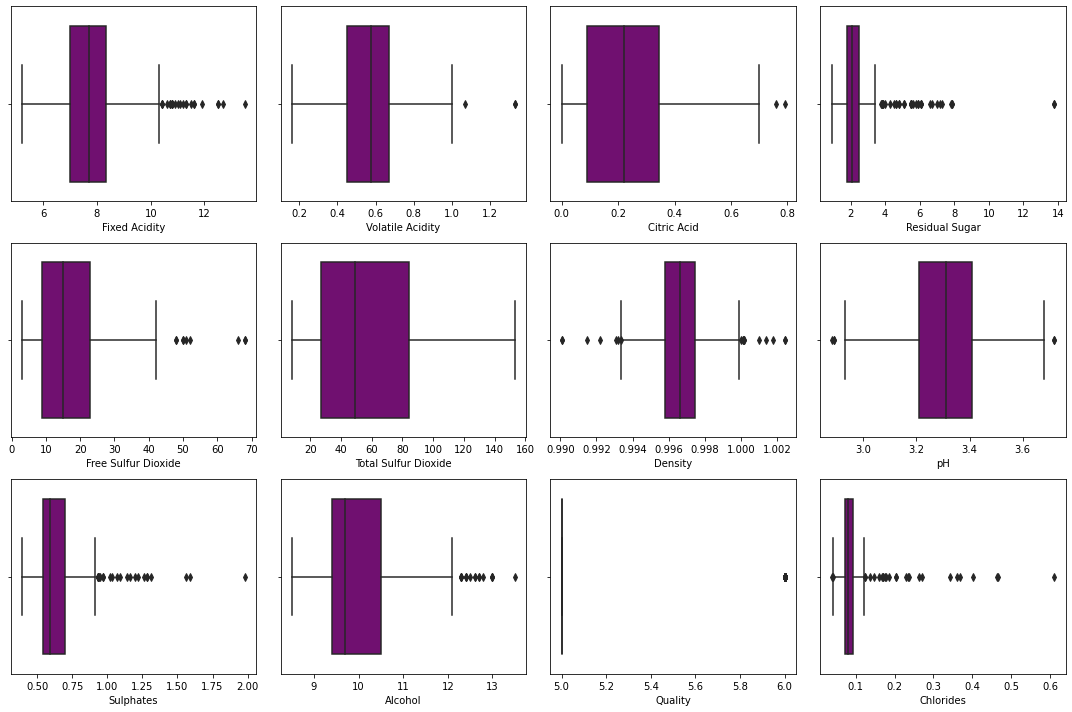

In [143]:
data = white_low_quality_df_rename
c2="purple"
plt.figure(figsize=(15,10))


plt.subplot(3,4,1)
sb.boxplot(x ='Fixed Acidity', data = white_low_quality_df_rename, color=c2)

plt.subplot(3,4,2)

sb.boxplot(x='Volatile Acidity', data = white_low_quality_df_rename, color=c2)

plt.subplot(3,4,3)
sb.boxplot(x='Citric Acid', data = white_low_quality_df_rename, color=c2)

plt.subplot(3,4,4)
sb.boxplot(x='Residual Sugar', data = white_low_quality_df_rename, color=c2)

plt.subplot(3,4,5)
sb.boxplot(x='Free Sulfur Dioxide', data = white_low_quality_df_rename, color=c2)

plt.subplot(3,4,6)
sb.boxplot(x='Total Sulfur Dioxide', data = white_low_quality_df_rename, color=c2)

plt.subplot(3,4,7)
sb.boxplot(x='Density', data = white_low_quality_df_rename, color=c2)

plt.subplot(3,4,8)
sb.boxplot(x='pH', data = white_low_quality_df_rename, color=c2)

plt.subplot(3,4,9)
sb.boxplot(x='Sulphates', data = white_low_quality_df_rename, color=c2)

plt.subplot(3,4,10)
sb.boxplot(x='Alcohol', data = white_low_quality_df_rename, color=c2)

plt.subplot(3,4,11)
sb.boxplot(x='Quality', data = white_low_quality_df_rename, color=c2)

plt.subplot(3,4,12)
sb.boxplot(x='Chlorides', data = white_low_quality_df_rename, color=c2)

plt.tight_layout()

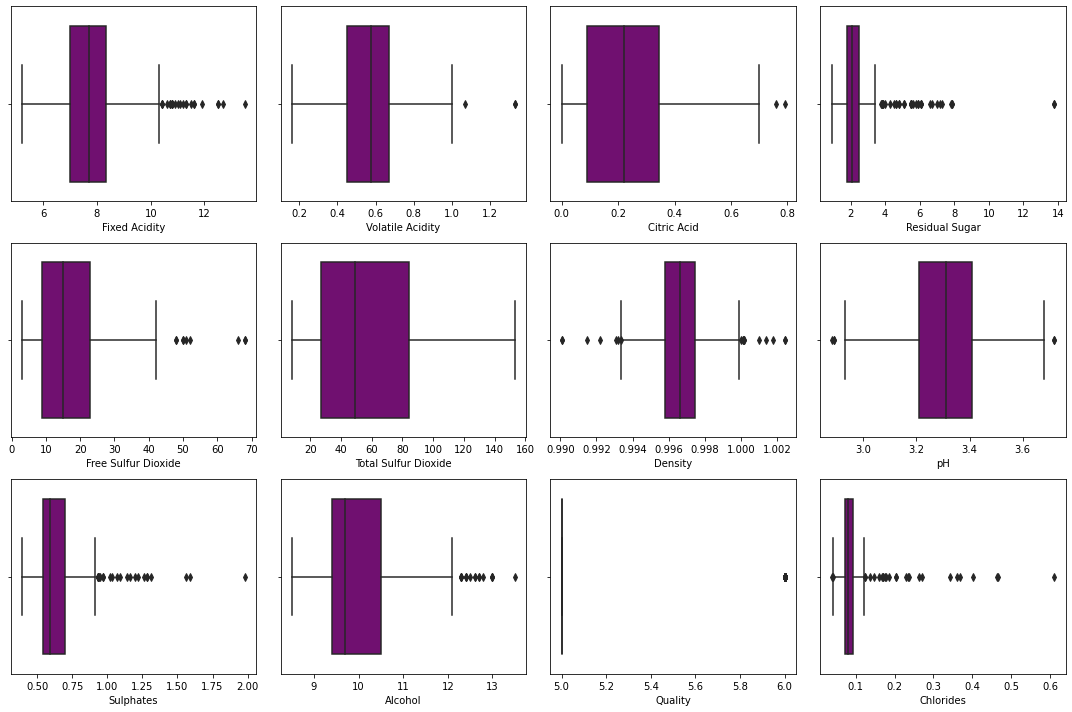

In [145]:
data = white_low_quality_df_rename
c2="purple"
plt.figure(figsize=(15,10))


plt.subplot(3,4,1)
sb.boxplot(x ='Fixed Acidity', data = white_low_quality_df_rename, color=c2)

plt.subplot(3,4,2)

sb.boxplot(x='Volatile Acidity', data = white_low_quality_df_rename, color=c2)

plt.subplot(3,4,3)
sb.boxplot(x='Citric Acid', data = white_low_quality_df_rename, color=c2)

plt.subplot(3,4,4)
sb.boxplot(x='Residual Sugar', data = white_low_quality_df_rename, color=c2)

plt.subplot(3,4,5)
sb.boxplot(x='Free Sulfur Dioxide', data = white_low_quality_df_rename, color=c2)

plt.subplot(3,4,6)
sb.boxplot(x='Total Sulfur Dioxide', data = white_low_quality_df_rename, color=c2)

plt.subplot(3,4,7)
sb.boxplot(x='Density', data = white_low_quality_df_rename, color=c2)

plt.subplot(3,4,8)
sb.boxplot(x='pH', data = white_low_quality_df_rename, color=c2)

plt.subplot(3,4,9)
sb.boxplot(x='Sulphates', data = white_low_quality_df_rename, color=c2)

plt.subplot(3,4,10)
sb.boxplot(x='Alcohol', data = white_low_quality_df_rename, color=c2)

plt.subplot(3,4,11)
sb.boxplot(x='Quality', data = white_low_quality_df_rename, color=c2)

plt.subplot(3,4,12)
sb.boxplot(x='Chlorides', data = white_low_quality_df_rename, color=c2)

plt.tight_layout()


In [146]:
#Create Average for each attribute - WHITE WINE LOW QUALITY
avg_fixed_acidity = white_low_quality_df_rename['Fixed Acidity'].mean()
avg_volatile_acidity = white_low_quality_df_rename['Volatile Acidity'].mean()
avg_citric_acid = white_low_quality_df_rename['Citric Acid'].mean()
avg_residual_sugar = white_low_quality_df_rename['Residual Sugar'].mean()
avg_chlorides = white_low_quality_df_rename['Chlorides'].mean()
avg_free_sulfur = white_low_quality_df_rename['Free Sulfur Dioxide'].mean()
avg_total_sulfur = white_low_quality_df_rename['Total Sulfur Dioxide'].mean()
avg_density = white_low_quality_df_rename['Density'].mean()
avg_pH = white_low_quality_df_rename['pH'].mean()
avg_sulphates = white_low_quality_df_rename['Sulphates'].mean()
avg_alcohol = white_low_quality_df_rename['Alcohol'].mean()

In [147]:
averages = {"Fixed Acidity": avg_fixed_acidity,
                            "Volatile Acidty":avg_volatile_acidity,
                            "Citric Acid": avg_citric_acid,
                            "Residual Sugar": avg_residual_sugar,
                            "Chlorides": avg_chlorides,
                            "Free Sulfur": avg_free_sulfur,
                            "Total Sulfur": avg_total_sulfur,
                            "Density": avg_density,
                            "pH":avg_pH,
                            "Sulphates":avg_sulphates,
                            "Alcohol":avg_alcohol}

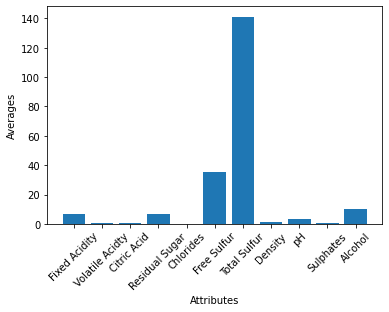

In [148]:
low_attributes = list(averages.keys())
low_amount = list(averages.values())
plt.ylabel('Averages')
plt.xlabel('Attributes')
plt.xticks(rotation = 45)
plt.bar(range(len(averages)), amount, tick_label=attributes,)
plt.show()

In [149]:
#create bar plot graph WHITE WINE LOW QUALITY

averages = ['"fixed acidity"', '"volatile acidity"','"citric acid"', '"residual sugar"', '"chlorides"', '"free sulfur dioxide"', '"total sulfur dioxide"', '"density"', '"pH"', '"sulphates"', '"alcohol"']
attributes = [avg_fixed_acidity, avg_volatile_acidity, avg_residual_sugar, avg_chlorides, avg_free_sulfur, avg_total_sulfur, avg_density,avg_pH, avg_sulphates, avg_alcohol]
x_axis = np.arange(len(attributes))

<BarContainer object of 10 artists>

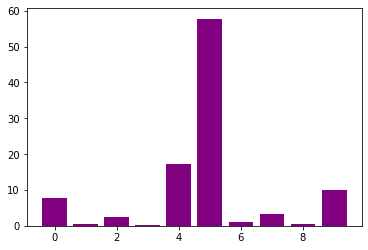

In [150]:
plt.bar(x_axis, attributes, color="purple", align="center")

In [ ]:
# Making scatter plot for chlorides

chlorides_x = white_low_quality_df_rename['Quality']
chlorides_y = white_low_quality_df_rename['Chlorides']
plt.scatter(chlorides_x, chlorides_y, marker="o", facecolors="purple", edgecolors="purple",
            s=chlorides_x, alpha=0.75)

In [ ]:

chlorides_x = white_low_quality_df_rename['Quality']
chlorides_y = white_low_quality_df_rename['Chlorides']
plt.scatter(chlorides_x, chlorides_y, marker="o", facecolors="purple", edgecolors="purple",
            s=chlorides_x, alpha=0.75)

In [ ]:
chlorides_x = white_low_quality_df_rename['Quality']
chlorides_y = white_low_quality_df_rename['Chlorides']
plt.scatter(chlorides_x, chlorides_y, marker="o", facecolors="purple", edgecolors="purple",
            s=chlorides_x, alpha=0.75)
plt.title("White Wine Low Quality Attributes")
plt.xlabel("Wine Quality")
plt.ylabel("Average Chlorides")

In [ ]:
fixed_acidity_x = white_low_quality_df_rename['Quality']
fixed_acidity_y = white_low_quality_df_rename['Fixed Acidity']
plt.scatter(fixed_acidity_x, fixed_acidity_y, marker="o", facecolors="purple", edgecolors="purple",
            s=chlorides_x, alpha=0.75)
plt.title("White Wine Low Quality Attributes")
plt.xlabel("Wine Quality")
plt.ylabel("Average Fixed Acidity")

In [ ]:
volatile_x = white_low_quality_df_rename['Quality']
volatile_y = white_low_quality_df_rename['Volatile Acidity']
plt.scatter(volatile_x, volatile_y, marker="o", facecolors="purple", edgecolors="purple",
            s=chlorides_x, alpha=0.75)
plt.title("White Wine Low Quality Attributes")
plt.xlabel("Wine Quality")
plt.ylabel("Average Volatile Acidity")

In [ ]:
c_acid_x = white_low_quality_df_rename['Quality']
c_acid_y = white_low_quality_df_rename['Citric Acid']
plt.scatter(c_acid_x, c_acid_y, marker="o", facecolors="purple", edgecolors="purple",
            s=chlorides_x, alpha=0.75)
plt.title("White Wine Low Quality Attributes")
plt.xlabel("Wine Quality")
plt.ylabel("Average Citric Acid")

In [ ]:
sugar_x = white_low_quality_df_rename['Quality']
sugar_y = white_low_quality_df_rename['Residual Sugar']
plt.scatter(sugar_x, sugar_y, marker="o", facecolors="purple", edgecolors="purple",
            s=chlorides_x, alpha=0.75)
plt.title("White Wine Low Quality Attributes")
plt.xlabel("Wine Quality")
plt.ylabel("Average Residual Sugar")

In [ ]:
free_x = white_low_quality_df_rename['Quality']
free_y = white_low_quality_df_rename['Free Sulfur Dioxide']
plt.scatter(free_x, free_y, marker="o", facecolors="purple", edgecolors="purple",
            s=chlorides_x, alpha=0.75)
plt.title("White Wine Low Quality Attributes")
plt.xlabel("Wine Quality")
plt.ylabel("Average Free Sulfur Dioxide")

In [ ]:
total_x = white_low_quality_df_rename['Quality']
total_y = white_low_quality_df_rename['Total Sulfur Dioxide']
plt.scatter(total_x, total_y, marker="o", facecolors="purple", edgecolors="purple",
            s=chlorides_x, alpha=0.75)
plt.title("White Wine Low Quality Attributes")
plt.xlabel("Wine Quality")
plt.ylabel("Average Total Sulfur Dioxide")

In [151]:
ph_x = white_low_quality_df_rename['Quality']
ph_y = white_low_quality_df_rename['pH']
plt.scatter(ph_x, ph_y, marker="o", facecolors="purple", edgecolors="purple",
            s=chlorides_x, alpha=0.75)
plt.title("White Wine Low Quality Attributes")
plt.xlabel("Wine Quality")
plt.ylabel("Average pH")

NameError: name 'chlorides_x' is not defined

In [ ]:
density_x = white_low_quality_df_rename['Quality']
density_y = white_low_quality_df_rename['Density']
plt.scatter(density_x, density_y, marker="o", facecolors="purple", edgecolors="purple",
            s=chlorides_x, alpha=0.75)
plt.title("White Wine Low Quality Attributes")
plt.xlabel("Wine Quality")
plt.ylabel("Average Density")

In [ ]:
sulphates_x = white_low_quality_df_rename['Quality']
sulphates_y = white_low_quality_df_rename['Sulphates']
plt.scatter(sulphates_x, sulphates_y, marker="o", facecolors="purple", edgecolors="purple",
            s=chlorides_x, alpha=0.75)
plt.title("White Wine Low Quality Attributes")
plt.xlabel("Wine Quality")
plt.ylabel("Average Sulphates")

In [ ]:
alcohol_x = white_low_quality_df_rename['Quality']
alcohol_y = white_low_quality_df_rename['Alcohol']
plt.scatter(sulphates_x, sulphates_y, marker="o", facecolors="purple", edgecolors="purple",
            s=chlorides_x, alpha=0.75)
plt.title("White Wine Low Quality Attributes")
plt.xlabel("Wine Quality")
plt.ylabel("Average Alcohol")

In [ ]:

data = white_low_quality_df_rename